<a href="https://colab.research.google.com/github/techsidh/NETFLIX-MOVIE-AND-TV-SHOWS-CLUSTERING/blob/main/Capstone_Project_NETFLIX_MOVIE_AND_TV_SHOWS_CLUSTERINg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

##**Importing Libraries**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.cm as cm
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS
import string

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Loading the Dataset**

In [38]:
netflix = pd.read_csv("/content/drive/MyDrive/capstone_4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
netflix_cp = netflix.copy()
netflix_cp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [39]:
netflix_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [40]:
netflix_cp.describe(include = "all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [41]:
print(f"Netflix datasets shape:{netflix_cp.shape}")

Netflix datasets shape:(7787, 12)


There are 7787 rows and 12 columns provided in the data.

#**Data Cleaning & Data Visualization**


###**Checking NaN values**

In [42]:
# Check for null values.
null_check = pd.DataFrame({"No Of Total Values": netflix_cp.shape[0] , "No of NaN values": netflix_cp.isnull().sum(),
                    "%age of NaN values" : round((netflix_cp.isnull().sum()/ netflix_cp.shape[0])*100 , 2) })
null_check.sort_values("No of NaN values" , ascending = False)


,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


Text(0.5, 1.0, 'Missing values in Colmuns')

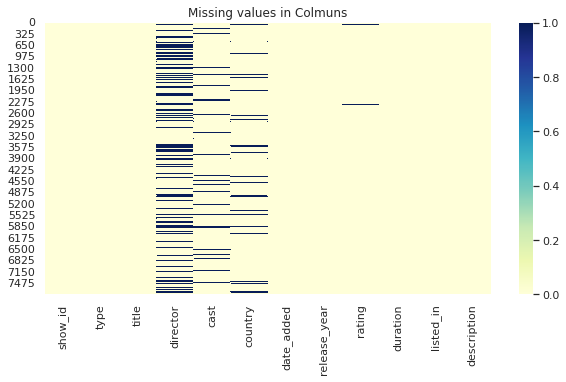

In [43]:
Nan_value = netflix_cp.isna()
plt.figure(figsize = (10,5))
sns.heatmap(Nan_value,cmap="YlGnBu").set_title("Missing values in Colmuns")

In [44]:
# Number of null values in rating.
netflix_cp.rating.isnull().sum()

7

In [45]:
netflix_cp.date_added.isnull().sum()

10

In [46]:
# Remove null values in rating.
netflix_cp.dropna(subset=['rating'], inplace=True)
netflix_cp.rating.isnull().sum()

0

In [47]:
netflix_cp.dropna(subset=['date_added'], inplace=True)
netflix_cp.date_added.isnull().sum()

0

In [48]:
print(f"Netflix datasets shape:{netflix_cp.shape}")

Netflix datasets shape:(7770, 12)


In [49]:
# Check for duplicated entries.
print(f"Total number of duplicated entries : {netflix_cp.duplicated().sum()}.")

Total number of duplicated entries : 0.


In [50]:
# Create new features to store date, day, month and year seperately.
netflix_cp['date_added'] = pd.to_datetime(netflix_cp['date_added'])
netflix_cp['days'] = netflix_cp['date_added'].dt.day
netflix_cp['months'] = netflix_cp['date_added'].dt.month
netflix_cp['years'] = netflix_cp['date_added'].dt.year

In [51]:
netflix_cp['years'].max()

2021

In [52]:
netflix_cp.drop('date_added',axis = 1,inplace = True)

In [53]:
netflix_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      5394 non-null   object
 4   cast          7052 non-null   object
 5   country       7265 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   object
 9   listed_in     7770 non-null   object
 10  description   7770 non-null   object
 11  days          7770 non-null   int64 
 12  months        7770 non-null   int64 
 13  years         7770 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 910.5+ KB


In [54]:
from collections import Counter

#Define displayed years:
years = list(range(2008,2020,1))

#separate movies and tv_shows:
movie_rows = netflix_cp.loc[netflix_cp["type"] == "Movie"]
tv_rows = netflix_cp.loc[netflix_cp["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

# Calculate percentages of movies and tv shows:
movies_per = round(movie_rows.shape[0] / netflix_cp["type"].shape[0] * 100, 2)
tvshows_per = round(tv_rows.shape[0] / netflix_cp["type"].shape[0] * 100, 2)

#Top most commen Actors an directors (Movies and tv shows):
casts = ", ".join(netflix_cp.copy().fillna("")['cast']).split(", ")
counter_list = Counter(casts).most_common(5)
most_commen_actors = [i for i in counter_list if i[0] != ""]
labels = [i[0] for i in most_commen_actors][::-1]
values = [i[1] for i in most_commen_actors][::-1]


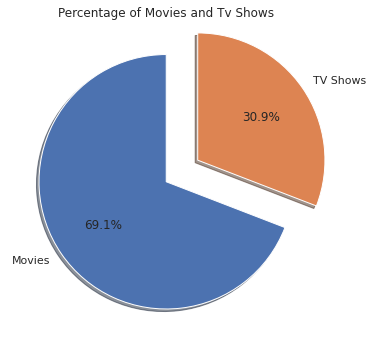

In [55]:
# Pie chart of type percentages
plt.figure(figsize = (10,5))
plt.pie([movies_per, tvshows_per], explode=(0, 0.3,), labels=["Movies", "TV Shows"], autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Percentage of Movies and Tv Shows')
plt.tight_layout()

plt.show()


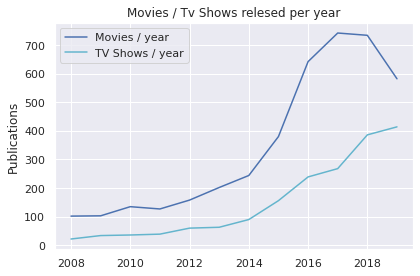

In [56]:
sns.lineplot(data=movies, color="b", label="Movies / year")
sns.lineplot(data=tv_shows, color="c", label="TV Shows / year")
plt.ylabel('Publications')
plt.title('Movies / Tv Shows relesed per year')
plt.tight_layout()

plt.show()


In [57]:
# Put the data into bins.
release_year = pd.cut(netflix_cp.release_year, [1924, 1999, 2010, 2021])
release_year.value_counts()
release_year = pd.DataFrame(release_year.value_counts()).reset_index()
release_year.rename(columns={'index':'Most_content_year', 'release_year':'count'}, inplace=True)
release_year['Most_content_year'] = release_year['Most_content_year'].astype('string')
release_year

,Most_content_year,count
0,"(2010, 2021]",6425
1,"(1999, 2010]",896
2,"(1924, 1999]",449


In [58]:
# Plot it.
px.pie(release_year, values='count', names='Most_content_year', color_discrete_sequence=px.colors.sequential.Plasma_r, title='Which was most content released.',height=500, width=500)


In [59]:
# Create dataframe to store manth values and counts.
months_df = pd.DataFrame(netflix_cp.months.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'months':'count'}, inplace=True)

fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#000000', '#564dbd'])
fig.update_layout(
    title={
        'text': 'Month wise addition of movies and shows to the platform',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500)


In [60]:
# Create dataframe to store day values and count.
days_df = pd.DataFrame(netflix_cp.days.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'days':'count'}, inplace=True)

fig = px.bar(days_df, x="day",y='count', text_auto=True, color='count', color_continuous_scale=['#000000', '#564dbd'])
fig.update_layout(
    title={
        'text': 'Day wise addition of movies and shows to the platform',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=800,
        height=500)



In [61]:
type(netflix_cp['listed_in'])

pandas.core.series.Series

In [62]:
netflix_cp['listed_in'].iloc[0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [63]:
(netflix_cp['listed_in'].iloc[0]).split(',')

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [64]:
no_of_categories = []
for catergory in netflix_cp.listed_in.values:
  len_cat = len(catergory.split(","))
  no_of_categories.append(len_cat)

In [65]:
netflix_cp['no_of_category_listed_in'] = no_of_categories
netflix_cp['no_of_category_listed_in'].unique()

array([3, 2, 1])

In [66]:
netflix_cp['no_of_category_listed_in'].value_counts()

3    3295
2    2682
1    1793
Name: no_of_category_listed_in, dtype: int64

Text(0, 0.5, 'Count')

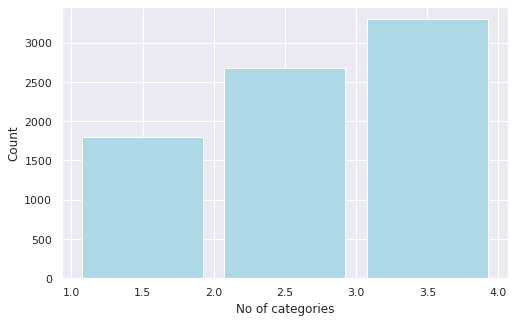

In [67]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(netflix_cp.no_of_category_listed_in , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='lightblue')
plt.xlabel("No of categories")
plt.ylabel("Count")

In [68]:
#replace null values in director.
netflix_cp['director'] = netflix_cp['director'].fillna('')

directors_list = netflix_cp.director.value_counts().reset_index().head(15)[1:]  # We will exclude the null values.
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#db74ca', '#563a4d'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)


In [69]:
#create list of all the actors in the data.
def data2list(data):
  actor = {}
  temp = []
  cast = list(data['cast'])
  for i in range(len(cast)):
    temp.extend(str(cast[i]).split(','))
  for i in temp:
    if i not in actor:
      actor[i] = temp.count(i)
  return actor

#create dataframe for list of actors

actor_list = pd.DataFrame([data2list(netflix_cp)]).T.reset_index()
actor_list = actor_list.sort_values(0,ascending = False).drop(106)

In [70]:
# Plot it.
top_actors = actor_list.head(10)
top_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#16334d', '#db0450'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
conuntry_vs_genre = netflix_cp[['country', 'listed_in']]
def country_wise_genre(country):
  country_genre = conuntry_vs_genre[conuntry_vs_genre['country'] == country]
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict
# Define list of top ten countries.
country_list = ['India', 'United Kingdom', 'Spain', 'Japan', 'France', 'United States','South Korea', 'Mexico', 'Australia','Canada']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)


df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen']

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['India', 'United Kingdom', 'Spain', 'Japan', 'France', 'United States','South Korea', 'Mexico', 'Australia','Canada'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'], name='India'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'],  name='United States'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )



In [72]:
print(f"Total number Unique Title:{netflix_cp['title'].nunique()}")

Total number Unique Title:7770


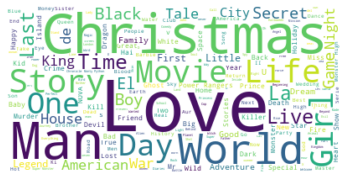

In [73]:
#subsetting df
netflix_wordcloud = netflix_cp['title']
text = " ".join(word for word in netflix_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Total number Unique Description:7752


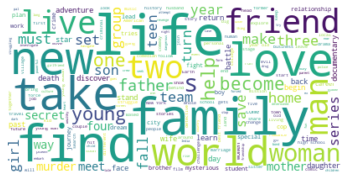

In [74]:
print(f"Total number Unique Description:{netflix_cp['description'].nunique()}")

#subsetting df
netflix_wordcloud = netflix_cp['description']
text = " ".join(word for word in netflix_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


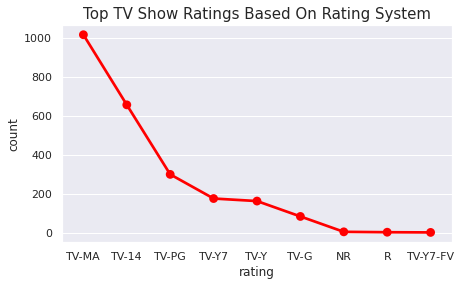

In [75]:
df_tv_show = netflix_cp[netflix_cp['type']== 'TV Show' ]
df_tv_show.head(2) 

#Pointplot on top tv show ratings 
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',color = "red",data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()


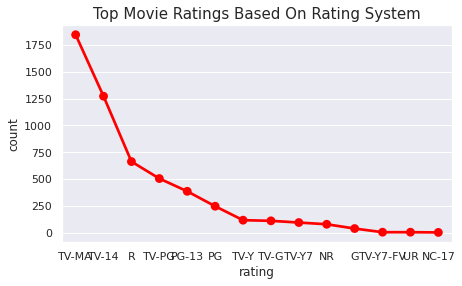

In [76]:
df_movie = netflix_cp[netflix_cp['type']== 'Movie' ]
df_movie.head(2) 
#Pointplot on top tv show ratings 
tv_ratings = df_movie.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',color = "red",data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='15')
plt.show()
